In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [91]:
tickers_democratic = ['EXC','F','APTV','STZ','EL','SPWR','KO','WMT','HD','NEE','CSX','MCD','SPG','FSLR','NSC']
tickers_republic = ['HON','COP','MRO','C','CRM','GILD','CVX','MRK','PYPL','AXP','V','AMZN','GOOG','QCOM','FB'] 

In [92]:
prices = pd.read_excel('factor.xlsx', sheet_name='prices', parse_dates=['Dates'], index_col='Dates')
prices.columns = prices.columns.str.replace(' US Equity', '')

prices_dem = prices[tickers_democratic]
prices_rep = prices[tickers_republic]

In [105]:
msci_factors = pd.read_excel('factor.xlsx', sheet_name='factors', parse_dates=['Dates'], index_col='Dates')
msci_factors.columns = msci_factors.columns.str.replace(' Index', '')

In [94]:
fama_factors = pd.read_csv('Fama-French.csv', parse_dates=['Dates'], index_col='Dates')
fama_factors = fama_factors/100

In [223]:
msci_factors.tail()

,M2US,M2US000$,M2USEV,M2USSNQ,M2US000G,M2US000V,M2USQU,M2US00MV,M2USSC,M2USVT,M1CXNNA,GSIN
Dates,,,,,,,,,,,,
2020-02-12,14289.87,3282.45,1698.24,5103.44,15699.08,16604.70,3263.62,2420.88,600.19,10976.72,3858.22,149.61
2020-02-13,14277.30,3304.51,1690.85,5089.76,15705.04,16567.34,3254.58,2419.10,601.71,10979.45,3844.07,149.42
2020-02-14,14308.85,3328.10,1680.14,5101.92,15780.93,16556.51,3267.00,2418.49,601.10,11015.04,3842.54,149.72
2020-02-17,14308.85,3328.10,1680.14,5101.92,15780.93,16556.51,3267.00,2418.49,601.10,11015.04,3842.54,149.68
2020-02-18,14308.85,3328.10,1680.14,5101.92,15780.93,16556.51,3267.00,2418.49,601.10,11015.04,3842.54,149.68


# 2016

In [163]:
dem_2016_ret = prices_dem.loc['2016-01-01':'2016-12-31'].resample('W-FRI').last().pct_change()[1:]
dem_port_2016 = dem_2016_ret.mean(axis=1)

rep_2016_ret = prices_rep.loc['2016-01-01':'2016-12-31'].resample('W-FRI').last().pct_change()[1:]
rep_port_2016 = rep_2016_ret.mean(axis=1)

In [164]:
#Removing beta from factors

msci_factor_ret = msci_factors.loc['2016-01-01':'2016-12-31'].resample('W-FRI').last().pct_change()[1:].dropna(axis=1,how='any')
beta_adj_msci_factor = msci_factor_ret.copy()
x=msci_factor_ret['M2US']
x = sm.add_constant(x)
for col in msci_factor_ret.drop('M2US', axis=1):
    
    y = msci_factor_ret[col]
    mod = sm.OLS(y, x)
    res = mod.fit()
    print(col, ' : ' ,res.params[1])
    
    beta_adj_msci_factor[col] = beta_adj_msci_factor[col] - beta_adj_msci_factor['M2US']*res.params[1]

beta_adj_msci_factor['constant'] = 1

M2US000$  :  0.9047305202187245
M2USEV  :  1.1476272063891566
M2USSNQ  :  0.9271407986171323
M2US000G  :  1.0450124629023874
M2US000V  :  0.9555845073755123
M2USQU  :  1.0004510812660032
M2US00MV  :  1.082981420729675
M2USSC  :  1.3666372282931771
M2USVT  :  0.8964686654686754
GSIN  :  0.9385040229766317


C:\Users\vinay\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [184]:
mod_dem = sm.OLS(dem_port_2016, beta_adj_msci_factor.drop('M2US000V', axis=1))
res_dem = mod_dem.fit()
#res_dem.summary()

In [185]:
mod_rep = sm.OLS(rep_port_2016, beta_adj_msci_factor.drop('M2US000V', axis=1))
res_rep = mod_rep.fit()
#res_rep.summary()

In [224]:
res_dem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     83.08
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           1.81e-73
Time:                        13:15:18   Log-Likelihood:                 1023.9
No. Observations:                 260   AIC:                            -2026.
Df Residuals:                     249   BIC:                            -1987.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
M2US           1.0168      0.037     27.811      0.000       0.945       1.089
M2US000$       0.3016      0.140      2.153      0.032       0.026       0.578
M2USEV         0.3757      0.165      2.283      0.023       0.052       0.700
M2USSNQ       -0.3970      0.413     -0.961      0.337      -1.211       0.417
M2US000G       0.0044      0.407      0.011      0.991      -0.798       0.807
M2USQU         0.4071      0.323      1.262      0.208      -0.228       1.043
M2US00MV       0.5528      0.157      3.517      0.001       0.243       0.862
M2USSC        -0.0955      0.107     -0.891      0.374      -0.307       0.116
M2USVT         1.2250      0.466      2.627      0.009       0.307       2.144
GSIN           0.0698      0.086      0.813      0.417      -0.099       0.239
constant      -0.0008      0.000     -2.601      0.010      -0.001      -0.000
==============================================================================
Omnibus:                       96.628   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              735.826
Skew:                          -1.265   Prob(JB):                    1.65e-160
Kurtosis:                      10.844   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
res_dem.params

M2US        1.006876
M2US000$   -0.035984
M2USEV      0.112819
M2USSNQ    -1.105502
M2US000G    0.358919
M2USQU      0.435496
M2US00MV    0.696767
M2USSC     -0.383613
M2USVT      2.037579
GSIN       -0.032015
constant   -0.004218
dtype: float64

In [187]:
res_rep.params

M2US        1.221149
M2US000$    0.391684
M2USEV      0.052525
M2USSNQ     0.221567
M2US000G   -1.453241
M2USQU     -0.948014
M2US00MV   -0.663611
M2USSC      0.110182
M2USVT     -3.129134
GSIN        0.308152
constant    0.000350
dtype: float64

# 2012

In [203]:
dem_2012_ret = prices_dem.loc['2012-01-01':'2012-12-31'].resample('W-FRI').last().pct_change()[1:]
dem_port_2012 = dem_2012_ret.mean(axis=1)

rep_2012_ret = prices_rep.loc['2012-01-01':'2012-12-31'].resample('W-FRI').last().pct_change()[1:]
rep_port_2012 = rep_2012_ret.mean(axis=1)

In [204]:
#Removing beta from factors

msci_factor_ret = msci_factors.loc['2012-01-01':'2012-12-31'].resample('W-FRI').last().pct_change()[1:].dropna(axis=1,how='any')
beta_adj_msci_factor = msci_factor_ret.copy()
x=msci_factor_ret['M2US']
x = sm.add_constant(x)
for col in msci_factor_ret.drop('M2US', axis=1):
    
    y = msci_factor_ret[col]
    mod = sm.OLS(y, x)
    res = mod.fit()
    print(col, ' : ' ,res.params[1])
    
    beta_adj_msci_factor[col] = beta_adj_msci_factor[col] - beta_adj_msci_factor['M2US']*res.params[1]

beta_adj_msci_factor['constant'] = 1

M2US000$  :  0.8296087355189441
M2USEV  :  1.1173724276716646
M2USSNQ  :  0.9398094107694933
M2US000G  :  1.02268030106291
M2US000V  :  0.9766667050521509
M2USQU  :  0.9331571772157226
M2US00MV  :  1.13608565034796
M2USSC  :  1.1810983227636636
GSIN  :  0.9988872891758378


In [207]:
mod_dem_2012 = sm.OLS(dem_port_2012, beta_adj_msci_factor.drop('M2US000V', axis=1))
res_dem_2012 = mod_dem_2012.fit()
#res_dem.summary()

In [208]:
mod_rep_2012 = sm.OLS(rep_port_2012, beta_adj_msci_factor.drop('M2US000V', axis=1))
res_rep_2012 = mod_rep_2012.fit()
#res_rep.summary()

In [209]:
res_dem_2012.params

M2US        1.012491
M2US000$   -0.386811
M2USEV      0.068539
M2USSNQ    -0.798950
M2US000G    1.016615
M2USQU     -0.377044
M2US00MV    0.639228
M2USSC     -0.092547
GSIN        0.275091
constant   -0.000035
dtype: float64

In [211]:
res_rep_2012.params

M2US        1.097745
M2US000$   -0.186298
M2USEV     -0.133908
M2USSNQ     0.427026
M2US000G    0.757193
M2USQU     -0.493611
M2US00MV   -0.080965
M2USSC     -0.086464
GSIN        0.385136
constant    0.001532
dtype: float64

In [215]:
res_rep_2012.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     18.21
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           7.77e-12
Time:                        12:04:16   Log-Likelihood:                 170.18
No. Observations:                  52   AIC:                            -320.4
Df Residuals:                      42   BIC:                            -300.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
M2US           1.0977      0.087     12.648      0.000       0.923       1.273
M2US000$      -0.1863      0.371     -0.502      0.618      -0.936       0.563
M2USEV        -0.1339      0.405     -0.331      0.743      -0.951       0.684
M2USSNQ        0.4270      0.622      0.687      0.496      -0.828       1.682
M2US000G       0.7572      0.729      1.038      0.305      -0.715       2.229
M2USQU        -0.4936      0.472     -1.047      0.301      -1.445       0.458
M2US00MV      -0.0810      0.408     -0.199      0.844      -0.904       0.742
M2USSC        -0.0865      0.290     -0.298      0.767      -0.672       0.499
GSIN           0.3851      0.339      1.137      0.262      -0.299       1.069
constant       0.0015      0.001      1.039      0.305      -0.001       0.005
==============================================================================
Omnibus:                        9.194   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.325
Skew:                           0.742   Prob(JB):                      0.00944
Kurtosis:                       4.449   Cond. No.                         634.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2016 daily

In [216]:
dem_2016_ret = prices_dem.loc['2016-01-01':'2016-12-31'].pct_change()[1:]
dem_port_2016 = dem_2016_ret.mean(axis=1)

rep_2016_ret = prices_rep.loc['2016-01-01':'2016-12-31'].pct_change()[1:]
rep_port_2016 = rep_2016_ret.mean(axis=1)

#Removing beta from factors

In [217]:
msci_factor_ret = msci_factors.loc['2016-01-01':'2016-12-31'].pct_change()[1:].dropna(axis=1,how='any')
beta_adj_msci_factor = msci_factor_ret.copy()
x=msci_factor_ret['M2US']
x = sm.add_constant(x)
for col in msci_factor_ret.drop('M2US', axis=1):
    
    y = msci_factor_ret[col]
    mod = sm.OLS(y, x)
    res = mod.fit()
    print(col, ' : ' ,res.params[1])
    
    beta_adj_msci_factor[col] = beta_adj_msci_factor[col] - beta_adj_msci_factor['M2US']*res.params[1]

beta_adj_msci_factor['constant'] = 1

mod_dem = sm.OLS(dem_port_2016, beta_adj_msci_factor.drop('M2US000V', axis=1))
res_dem = mod_dem.fit()
#res_dem.summary()

mod_rep = sm.OLS(rep_port_2016, beta_adj_msci_factor.drop('M2US000V', axis=1))
res_rep = mod_rep.fit()
#res_rep.summary()

M2US000$  :  0.8734821588042267
M2USEV  :  1.1122838993201418
M2USSNQ  :  0.9330217806819975
M2US000G  :  1.014604516699936
M2US000V  :  0.9855621466563058
M2USQU  :  0.9590881621307368
M2US00MV  :  1.0742022920538428
M2USSC  :  1.1912460098762763
M2USVT  :  0.8898818574498577
GSIN  :  0.8667593883250937


C:\Users\vinay\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [218]:
res_dem.params

M2US        1.016843
M2US000$    0.301640
M2USEV      0.375679
M2USSNQ    -0.397027
M2US000G    0.004434
M2USQU      0.407067
M2US00MV    0.552760
M2USSC     -0.095519
M2USVT      1.225010
GSIN        0.069846
constant   -0.000789
dtype: float64

In [219]:
res_rep.params

M2US        1.264877
M2US000$    0.361764
M2USEV     -0.303819
M2USSNQ    -0.190524
M2US000G   -2.118831
M2USQU      0.190234
M2US00MV   -0.171182
M2USSC     -0.068940
M2USVT     -3.860310
GSIN        0.037370
constant   -0.000012
dtype: float64

In [220]:
res_dem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     83.08
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           1.81e-73
Time:                        12:08:31   Log-Likelihood:                 1023.9
No. Observations:                 260   AIC:                            -2026.
Df Residuals:                     249   BIC:                            -1987.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
M2US           1.0168      0.037     27.811      0.000       0.945       1.089
M2US000$       0.3016      0.140      2.153      0.032       0.026       0.578
M2USEV         0.3757      0.165      2.283      0.023       0.052       0.700
M2USSNQ       -0.3970      0.413     -0.961      0.337      -1.211       0.417
M2US000G       0.0044      0.407      0.011      0.991      -0.798       0.807
M2USQU         0.4071      0.323      1.262      0.208      -0.228       1.043
M2US00MV       0.5528      0.157      3.517      0.001       0.243       0.862
M2USSC        -0.0955      0.107     -0.891      0.374      -0.307       0.116
M2USVT         1.2250      0.466      2.627      0.009       0.307       2.144
GSIN           0.0698      0.086      0.813      0.417      -0.099       0.239
constant      -0.0008      0.000     -2.601      0.010      -0.001      -0.000
==============================================================================
Omnibus:                       96.628   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              735.826
Skew:                          -1.265   Prob(JB):                    1.65e-160
Kurtosis:                      10.844   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

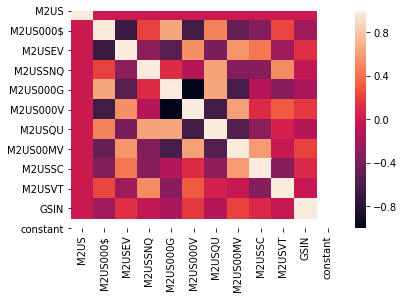

In [221]:
sn.heatmap(beta_adj_msci_factor.corr())